In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/sales_data_2.csv')

In [3]:
df.head(5)

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [4]:
df.shape

(70, 7)

In [5]:
''' 6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? '''

# Calculate the daily gross profit considering quantities bought and quantities sold
df['Daily Gross Profit'] = (df['Selling price'] - df['Buying price']) * (df['Quantity sold'] - df['Quantity bought'])

# Group by date and calculate the sum of daily gross profit for each day
daily_profit = df.groupby('Date')['Daily Gross Profit'].sum().reset_index()

# Calculate the 3-day rolling average
daily_profit['3-Day Average'] = daily_profit['Daily Gross Profit'].rolling(window=3).mean()

# Print the result
print(daily_profit)

         Date  Daily Gross Profit  3-Day Average
0  2023-08-21            -2309.98            NaN
1  2023-08-22            -3731.70            NaN
2  2023-08-23            -4206.03   -3415.903333
3  2023-08-24            -2579.83   -3505.853333
4  2023-08-25            -5111.76   -3965.873333
5  2023-08-26            -3913.75   -3868.446667
6  2023-08-27            -5295.19   -4773.566667


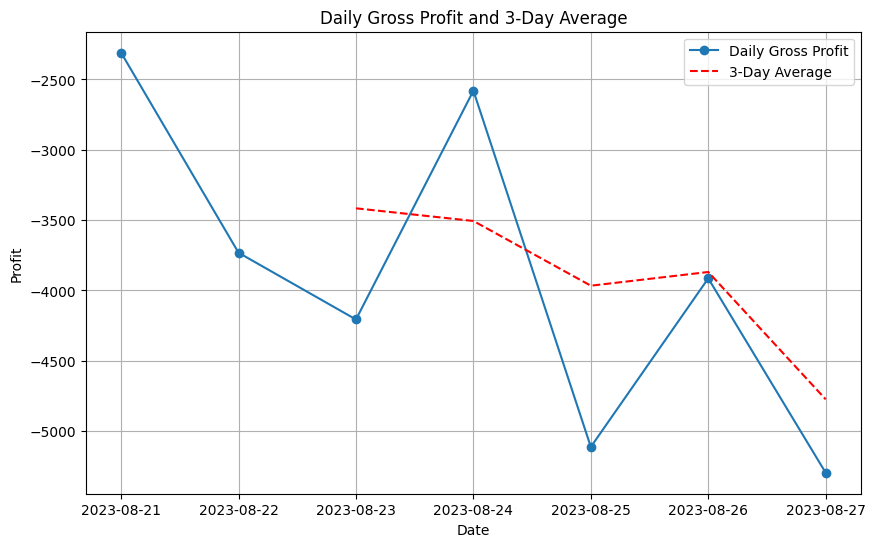

In [6]:
'''7.Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.'''
# Plot the daily gross profit and 3-day average
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(daily_profit['Date'], daily_profit['Daily Gross Profit'], label='Daily Gross Profit', marker='o')
plt.plot(daily_profit['Date'], daily_profit['3-Day Average'], label='3-Day Average', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Daily Gross Profit and 3-Day Average')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
'''8. Can you optimize the sales process to ensure gross margin is maximized?'''
# Calculate the daily gross profit
df['Gross Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']

# Group by date and calculate the sum of daily gross profit for each day
daily_profit = df.groupby('Date')['Daily Gross Profit'].sum().reset_index()



In [10]:
'''a. Would you fire any vendor?'''
# Calculate the daily gross profit
df['Gross Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
vendor_profit_margin = df.groupby('Firm bought from')['Gross Profit'].mean()
low_profit_vendors = vendor_profit_margin[vendor_profit_margin < vendor_profit_margin.median()]

In [11]:
vendor_profit_margin.median()

380.17202380952375

In [13]:
low_profit_vendors


Firm bought from
Vendor1    311.118000
Vendor2    117.907273
Vendor5    230.877143
Vendor7    354.360714
Vendor8     84.580000
Name: Gross Profit, dtype: float64

In [14]:
'''b. Would you let go of any customer?  ?'''
customer_profit_margin = df.groupby('Customer')['Gross Profit'].mean()
low_profit_customers = customer_profit_margin[customer_profit_margin < customer_profit_margin.median()]

In [15]:
customer_profit_margin.median()

403.6914999999999

In [16]:
low_profit_customers

Customer
Customer3    150.721429
Customer5    187.897143
Customer6    275.822857
Customer7    313.945714
Customer9    385.816000
Name: Gross Profit, dtype: float64

In [ ]:
''' 9.  Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? '''

import numpy as np
# Calculate the 25th, 50th (median), and 75th percentiles for buying and selling prices
percentiles = [25, 50, 75]  # You can change these percentiles as needed

buying_price_percentiles = np.percentile(df['Buying price'], percentiles)
selling_price_percentiles = np.percentile(df['Selling price'], percentiles)

print("Buying Price Percentiles:")
for p, percentile in zip(percentiles, buying_price_percentiles):
    print(f"{p}th Percentile: {percentile:.2f}")

print("\nSelling Price Percentiles:")
for p, percentile in zip(percentiles, selling_price_percentiles):
    print(f"{p}th Percentile: {percentile:.2f}")

Buying Price Percentiles:
25th Percentile: 29.90
50th Percentile: 60.76
75th Percentile: 78.32

Selling Price Percentiles:
25th Percentile: 38.98
50th Percentile: 78.99
75th Percentile: 103.40


In [ ]:
''' 10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile,
 potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history. '''

# Calculate the 25th and 75th percentiles for buying and selling prices for Sapota
buying_price_25th_percentile = buying_price_percentiles[0]
buying_price_75th_percentile = buying_price_percentiles[2]

selling_price_25th_percentile = selling_price_percentiles[0]
selling_price_75th_percentile = selling_price_percentiles[2]

# Count how many times Sapota's prices fall below the 25th percentile or above the 75th percentile
below_25th_buying = (df['Buying price'] < buying_price_25th_percentile).sum()
above_75th_buying = (df['Buying price'] > buying_price_75th_percentile).sum()

below_25th_selling = (df['Selling price'] < selling_price_25th_percentile).sum()
above_75th_selling = (df['Selling price'] > selling_price_75th_percentile).sum()

# Print the results
print(f"Sapota's Buying Price Below 25th Percentile: {below_25th_buying} times")
print(f"Sapota's Buying Price Above 75th Percentile: {above_75th_buying} times")
print(f"Sapota's Selling Price Below 25th Percentile: {below_25th_selling} times")
print(f"Sapota's Selling Price Above 75th Percentile: {above_75th_selling} times")

Sapota's Buying Price Below 25th Percentile: 18 times
Sapota's Buying Price Above 75th Percentile: 18 times
Sapota's Selling Price Below 25th Percentile: 18 times
Sapota's Selling Price Above 75th Percentile: 18 times


In [17]:
''' 11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? '''
# Calculate the gross margin for each transaction
df['Gross Margin'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']

# Group by vendor and calculate the sum of gross margin for each vendor
vendor_gross_margin = df.groupby('Firm bought from')['Gross Margin'].sum()

# Find the vendor with the maximum gross margin
max_gross_margin_vendor = vendor_gross_margin.idxmax()
max_gross_margin_value = vendor_gross_margin.max()

# Print the result
print(f"The vendor with the maximum gross margin is {max_gross_margin_vendor} with a total gross margin of ${max_gross_margin_value:.2f}")

The vendor with the maximum gross margin is Vendor4 with a total gross margin of $6903.31


In [18]:
vendor_gross_margin

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Gross Margin, dtype: float64

In [ ]:
'''12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?'''

# Calculate the gross margin for each transaction
df['Gross Margin Theoretical'] = (df['Selling price'] - df['Buying price']) * df['Quantity bought']

# Group by vendor and calculate the sum of gross margin for each vendor
vendor_gross_margin_theoretical = df.groupby('Firm bought from')['Gross Margin Theoretical'].sum()

# Find the vendor with the maximum gross margin
max_gross_margin_vendor_theoretical = vendor_gross_margin_theoretical.idxmax()
max_gross_margin_value_theoretical = vendor_gross_margin_theoretical.max()

# Print the result
print(f"The vendor with the maximum gross margin is {max_gross_margin_vendor_theoretical} with a total gross margin of ${max_gross_margin_value_theoretical:.2f}")

The vendor with the maximum gross margin is Vendor7 with a total gross margin of $11962.00


In [ ]:
'''13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) '''

# Filter data for vendor7
vendor7_data = df[df['Firm bought from'] == 'Vendor7']

# Calculate the initial daily gross profit for vendor7
initial_daily_gross_profit = (vendor7_data['Selling price'] - vendor7_data['Buying price']) * vendor7_data['Quantity sold']

# Calculate the new daily gross profit after increasing the price by Rs. 1
new_selling_price_increase = vendor7_data['Selling price'] + 1
new_daily_gross_profit_increase = (new_selling_price_increase - vendor7_data['Buying price']) * vendor7_data['Quantity sold']

# Calculate the new daily gross profit after decreasing the price by Rs. 1
new_selling_price_decrease = vendor7_data['Selling price'] - 1
new_daily_gross_profit_decrease = (new_selling_price_decrease - vendor7_data['Buying price']) * vendor7_data['Quantity sold']

# Calculate the difference in daily gross profit for each scenario
sales_increase = new_daily_gross_profit_increase.sum() - initial_daily_gross_profit.sum()
sales_decrease = new_daily_gross_profit_decrease.sum() - initial_daily_gross_profit.sum()

print(f"If you increase the price by Rs. 1 for vendor7, sales will go up by Rs. {sales_increase:.2f}")
print(f"If you decrease the price by Rs. 1 for vendor7, sales will go down by Rs. {sales_decrease:.2f}")

If you increase the price by Rs. 1 for vendor7, sales will go up by Rs. 270.00
If you decrease the price by Rs. 1 for vendor7, sales will go down by Rs. -270.00
